In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns
from sklearn import metrics

In [397]:
df = pd.read_csv('data/voice.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [398]:
df['label'] = df['label'].map({'male': 1, 'female': 0})

In [399]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [400]:
print(X_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2534, 20)
(2534,)
(634, 20)
(634,)


In [401]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(x_test)

In [402]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [417]:
y_predict = model.predict(x_test)
print(metrics.accuracy_score(y_predict, y_test))
print(mean_squared_error(y_test, y_predict))

0.973186119873817
0.026813880126182965


In [404]:
corr = df.corr().abs()
corr['label'].sort_values(ascending=False)

label       1.000000
meanfun     0.833921
IQR         0.618916
Q25         0.511455
sp.ent      0.490552
sd          0.479539
sfm         0.357499
centroid    0.337415
meanfreq    0.337415
median      0.283919
maxdom      0.195657
mindom      0.194974
dfrange     0.192213
meandom     0.191067
mode        0.171775
maxfun      0.166461
minfun      0.136692
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
Name: label, dtype: float64

Text(0.5,1,'Correlations Among Features')

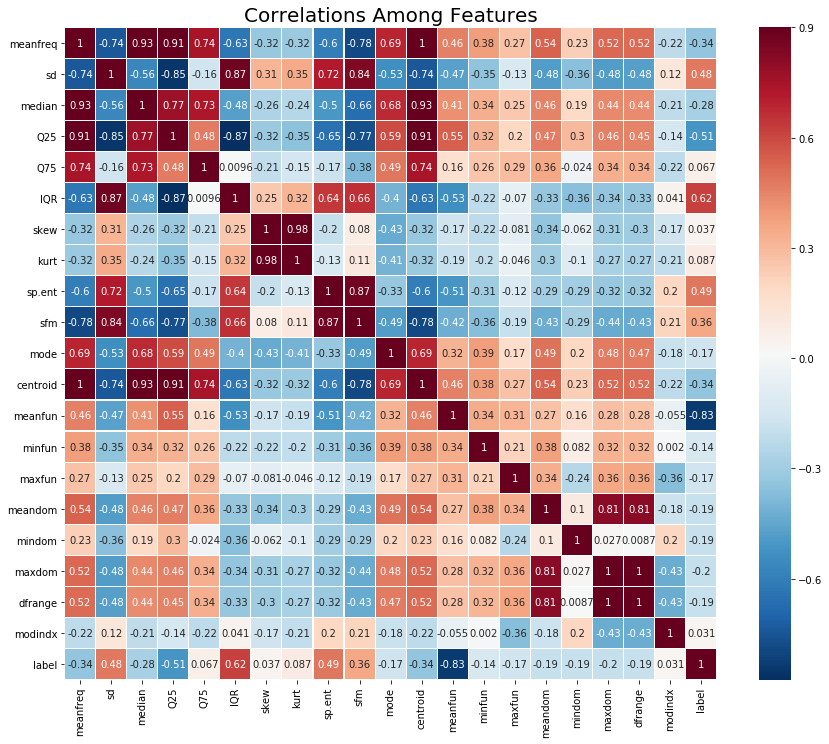

In [405]:
mask = np.zeros_like(corr, dtype=np.bool)

plt.subplots(figsize=(15,12))
sns.heatmap(df.corr(),
           annot=True,
           cmap='RdBu_r',
           linewidths=0.1,
           linecolor='white',
           vmax=.9,
           square=True)
plt.title('Correlations Among Features', fontsize=20)

In [406]:
corr_df = pd.DataFrame((abs(df.corr()['label'])).sort_values(ascending=False))

In [407]:
corr_df.sort_values(by='label',ascending=False)

,label
label,1.000000
meanfun,0.833921
IQR,0.618916
Q25,0.511455
sp.ent,0.490552
sd,0.479539
sfm,0.357499
centroid,0.337415
meanfreq,0.337415
median,0.283919


In [408]:
## Dropping columns with correlation less than 0.2
cols_to_drop = ['maxdom', 'mindom', 'dfrange', 'meandom', 'mode', 'maxfun', 'minfun', 'kurt','Q75']
df = df.drop(cols_to_drop, axis=1)

In [409]:
df.head()

,meanfreq,sd,median,Q25,IQR,skew,sp.ent,sfm,centroid,meanfun,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.075122,12.863462,0.893369,0.491918,0.059781,0.084279,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.073252,22.423285,0.892193,0.513724,0.066009,0.107937,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.123207,30.757155,0.846389,0.478905,0.077316,0.098706,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.111374,1.232831,0.963322,0.727232,0.151228,0.088965,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.127325,1.101174,0.971955,0.783568,0.135120,0.106398,0.208274,1


In [410]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [411]:
print(X_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2534, 11)
(2534,)
(634, 11)
(634,)


In [412]:
X_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(x_test)

In [413]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.coef_

array([[ 0.56410055,  0.29180817, -0.30506015, -0.63388009,  1.90941356,
        -0.72862773,  0.77700692, -1.14964607,  0.56410055, -4.79543242,
        -0.39629627]])

In [418]:
predict = model.predict(x_test)
print(metrics.accuracy_score(predict, y_test))
print(mean_squared_error(y_test, predict)) ## Value closer to 0.0 its better

0.973186119873817
0.026813880126182965
